<a href="https://colab.research.google.com/github/killianraes/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Eye_blinking_prediction/workpage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd


<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

Let's load the train and test set:

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

sample_submission = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/sample_submission.csv")


You will fit a model on the trainset and make predictions on the testset. 

To submit these predictions to Kaggle you need to write a .csv file with two columns: 
- `index` that matches the `index` column in the test set.
- `label` which is your prediction.

Here is an example predictions file for Kaggle:

In [3]:
sample_submission.head(10)

,index,label
0,0,0.168801
1,1,0.124169
2,2,0.947757
3,3,0.069585
4,4,0.635325
5,5,0.659027
6,6,0.653697
7,7,0.850030
8,8,0.160489
9,9,0.843272


In [0]:
#Make copy's of data, in case something goes wrong
data_train = trainset.copy()
data_test = testset.copy()

In [5]:
#Study training data
print(data_train.head())
print(data_train.describe())
print(data_train.label.value_counts())

       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
               AF3           F7  ...          AF4        label
count  2000.000000  2000.000000  ...  2000.000000  2000.000000
mean   4300.157125  4009.273150  ...  4359.852780     0.450500
std      36.361719    29.853264  ...    37.074555     0.497668
min    4197.950000  3905.640000  ...  4225.640000     0.000000
25%    4280.510000  3990.770000  ...  4342.050000     0.000000
50%    4293.330000  4006.150000  ...  4354.360000     0.000000
75%    4309.740000  4023.590000  ...  4371.790000     1.000000
max    4497

In [6]:
#Preprocess training data
from sklearn.preprocessing import StandardScaler

X_train = data_train.copy()
y_train = X_train.pop('label')

feature_scaler = StandardScaler()
feature_scaler.fit(X_train)

X_train = pd.DataFrame(feature_scaler.transform(X_train))
X_train.columns = data_train.columns[:-1]

X_train.head()


,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,-0.018351,-0.396476,0.677912,-0.277047,0.733699,0.167400,1.330668,0.454721,0.093570,-0.068336,0.418469,0.026714,-0.156365,0.252992
1,0.052070,-0.791842,-0.136210,0.346482,-0.434286,-0.259658,0.007585,-1.609301,-0.482085,-0.276922,-0.232997,0.235973,0.060820,-0.037576
2,0.574178,0.222036,0.061066,-0.002733,-0.496011,-0.373355,0.031954,-0.716795,-0.482085,-0.381214,-1.894254,0.392280,0.091976,0.322059
3,2.972354,3.177226,5.588146,5.335202,6.480134,7.221060,4.638614,6.311759,6.199439,6.193291,4.834001,5.588622,3.349453,2.812530
4,1.293521,-1.135609,0.135164,-0.975478,-0.496011,-0.117120,1.208346,-0.131037,0.554655,0.505527,1.911632,1.776139,1.782573,1.401236


In [7]:
#study test data
data_test.head()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,index
0,4296.41,4040.51,4253.33,4124.10,4341.54,4618.46,4075.38,4601.03,4183.59,4204.10,4197.44,4268.72,4598.46,4342.56,0
1,4291.28,3994.36,4247.18,4102.56,4328.21,4616.41,4057.44,4622.56,4198.46,4227.69,4190.77,4260.51,4593.33,4337.95,1
2,4299.49,4019.49,4269.74,4116.41,4344.10,4635.38,4067.18,4627.18,4211.28,4233.33,4202.56,4280.51,4596.92,4350.26,2
3,4280.00,4004.62,4263.59,4120.51,4323.59,4603.08,4040.51,4589.23,4174.87,4212.82,4192.82,4271.79,4608.72,4344.10,3
4,4317.44,3968.72,4260.51,4101.54,4341.54,4600.51,4071.28,4607.69,4191.28,4231.28,4199.49,4282.05,4592.31,4372.82,4


In [8]:
#preprocess test data
X_test = data_test.copy()
index = X_test.pop('index')

X_test = pd.DataFrame(feature_scaler.transform(X_test))
X_test.columns = data_test.columns[:-1]

X_test.head()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,-0.103077,1.046608,-0.506702,0.072168,-0.004007,-0.088835,0.154276,-0.772271,-0.971812,-1.346811,-0.169859,-0.495161,-0.202948,-0.466549
1,-0.244195,-0.499673,-0.802616,-0.975478,-0.802839,-0.202532,-0.702932,0.398702,-0.136692,-0.146683,-0.443319,-0.913170,-0.358124,-0.590924
2,-0.018351,0.342321,0.282880,-0.301852,0.149407,0.849583,-0.237536,0.649974,0.583297,0.140249,0.040053,0.105122,-0.249531,-0.258808
3,-0.554489,-0.155906,-0.013033,-0.102439,-1.079704,-0.941841,-1.511881,-1.414048,-1.461540,-0.903186,-0.359272,-0.338853,0.107403,-0.425001
4,0.475423,-1.358756,-0.161230,-1.025087,-0.004007,-1.084378,-0.041630,-0.410047,-0.539931,0.035956,-0.085812,0.183531,-0.388978,0.349848


In [9]:
#2 classes -> logistic regression?
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train)
score = np.mean(scores)
print('accuracy score for model = {}'.format(score))

model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
sample_submission = pd.DataFrame()
sample_submission['index'] = index
sample_submission['label'] = predictions['1']




accuracy score for model = 0.6205


In [39]:
#XGBoost?
from xgboost import XGBClassifier

model = XGBClassifier()
scores = cross_val_score(model, X_train, y_train)
score = np.mean(scores)
print(score)


0.796


In [11]:
#Decision Tree?
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train, y_train)
score = np.mean(scores)
print(score)

0.74


In [12]:
#Naive Bayes?
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
scores = cross_val_score(model, X_train, y_train)
score = np.mean(scores)
print(score)

0.6040000000000001


In [13]:
#K
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
scores = cross_val_score(model, X_train, y_train)
score = np.mean(scores)
print(score)

0.866


In [14]:
#RandomForest?
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train)
score = np.mean(scores)
print(score)


0.8385


In [15]:
#support vector machines
from sklearn.svm import SVC

clf = SVC(kernel='linear')
scores = cross_val_score(clf, X_train, y_train)
score = np.mean(scores)
print(score)


0.6399999999999999


In [0]:
#All models grouped together
models = dict()
models['dec_tr'] = DecisionTreeClassifier()
models['log_re'] = LogisticRegression()
models['SVM'] = SVC()
models['nai_ba'] = GaussianNB()
models['K_nei'] = KNeighborsClassifier()



In [17]:
#All models are evaluated
results = list()
names = list()
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' %(name, np.mean(scores), np.std(scores)))

>dec_tr 0.738 (0.033)
>log_re 0.621 (0.018)
>SVM 0.812 (0.017)
>nai_ba 0.604 (0.018)
>K_nei 0.866 (0.012)


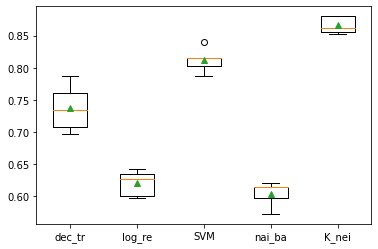

In [18]:
#Visualise results
from matplotlib import pyplot

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [0]:
#Plot shows that K_neighbour is initially the best model (for training data)
#Fitting and predicting test data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
sample_submission = pd.DataFrame()
sample_submission['index'] = index
sample_submission['label'] = predictions['1']


In [20]:
#Attempt stacking
from sklearn.ensemble import StackingClassifier

level_0 = list()
level_0.append(('log_re', LogisticRegression()))
level_0.append(('K_nei', KNeighborsClassifier()))
level_0.append(('dec_tr', DecisionTreeClassifier()))
level_0.append(('SVM', SVC()))
level_0.append(('nai_ba', GaussianNB()))

level_1 = LogisticRegression()

model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=5)

scores = cross_val_score(model, X_train, y_train)
print(np.mean(scores))

0.8705


>dec_tr 0.739 (0.037)
>log_re 0.622 (0.019)
>SVM 0.812 (0.017)
>nai_ba 0.604 (0.018)
>K_nei 0.866 (0.012)
>Stack 0.870 (0.022)


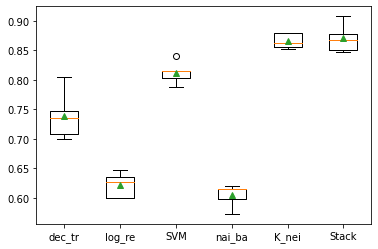

In [21]:
#Add stacking to previous model comparison
models = dict()
models['dec_tr'] = DecisionTreeClassifier()
models['log_re'] = LogisticRegression(C = 0.49417133613238384)
models['SVM'] = SVC()
models['nai_ba'] = GaussianNB()
models['K_nei'] = KNeighborsClassifier()
models['Stack'] = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=5)

results = list()
names = list()
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' %(name, np.mean(scores), np.std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [0]:
#Stacking prediction
from sklearn.ensemble import StackingClassifier

level_0 = list()
level_0.append(('log_re', LogisticRegression()))
level_0.append(('K_nei', KNeighborsClassifier()))
level_0.append(('dec_tr', DecisionTreeClassifier()))
level_0.append(('SVM', SVC()))
level_0.append(('nai_ba', GaussianNB()))

level_1 = LogisticRegression()

model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)

model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
sample_submission = pd.DataFrame()
sample_submission['index'] = index
sample_submission['label'] = predictions['1']

In [23]:
#Optimizing model parameters for all individual level 0  models
##Logistic Regression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression(random_state=0)
params = {'C': np.logspace(-5, 5, 50)}
clf = GridSearchCV(model, param_grid= params, cv = 5)
best_params = clf.fit(X_train, y_train)

print('Best C:', best_params.best_estimator_.get_params()['C'])

Best C: 0.49417133613238384


In [24]:
##KNeighbors
model = KNeighborsClassifier()
n_neighbors = [50,2,5,10,25]
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
p = [1, 2]
params = {'n_neighbors':n_neighbors,
          'weights': weights,
          'algorithm': algorithm,
          'p': p}
clf = GridSearchCV(model, param_grid=params, cv=5)
best_params = clf.fit(X_train, y_train)

print('Best n_neighbors:', best_params.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_params.best_estimator_.get_params()['weights'])
print('Best algorithm:', best_params.best_estimator_.get_params()['algorithm'])
print('Best p:', best_params.best_estimator_.get_params()['p'])

Best n_neighbors: 2
Best weights: distance
Best algorithm: ball_tree
Best p: 2


In [25]:
##Decision tree
model = DecisionTreeClassifier(random_state=0)
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [5, 10, 25, 50, 100, None]
max_features = ['auto', 'sqrt', 'log2', 1, 5, 10, 25, None]
max_leaf_nodes = [5, 10, 25, 50, 100, None]
params = {'criterion':criterion,
          'splitter':splitter,
          'max_depth':max_depth,
          'max_features':max_features,
          'max_leaf_nodes':max_leaf_nodes}
clf = GridSearchCV(model, param_grid=params, cv=5)
best_params = clf.fit(X_train, y_train)

print('Best criterion:', best_params.best_estimator_.get_params()['criterion'])
print('Best splitter:', best_params.best_estimator_.get_params()['splitter'])
print('Best max_depth:', best_params.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_params.best_estimator_.get_params()['max_features'])
print('Best max_leaf_nodes:', best_params.best_estimator_.get_params()['max_leaf_nodes'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

Best criterion: gini
Best splitter: best
Best max_depth: 25
Best max_features: 10
Best max_leaf_nodes: None


In [26]:
##Support vector machine
model = SVC(random_state=0)
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma = ['scale', 'auto', 0.00001, 0.0001, 0.001, 0.01, 0.1]
params = {'C': C,
          'gamma': gamma}

clf = GridSearchCV(model, param_grid=params, cv=5)
best_params = clf.fit(X_train, y_train)

print('Best C:', best_params.best_estimator_.get_params()['C'])
print('Best gamma:', best_params.best_estimator_.get_params()['gamma'])

Best C: 100
Best gamma: 0.1


In [0]:
##Naive Bayes (no hyperparameters)
model = GaussianNB()


In [0]:
#Predictions stacking model
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(max_depth=25, 
                                                 max_features=10, 
                                                 random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))

level_1 = LogisticRegression(random_state=0)

model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)

model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
sample_submission = pd.DataFrame()
sample_submission['index'] = index
sample_submission['label'] = predictions['1']

In [0]:
#Other level 1 better?
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(max_depth=25, 
                                                 max_features=10, 
                                                 random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))
level_0.append(('Ran_fr', RandomForestClassifier(random_state=0)))
level_0.append(('XGB', XGBClassifier(learning_rate = 0.2, 
                                     n_estimators=100, 
                                     objective='binary:logistic', 
                                     max_depth=5, 
                                     min_child_weight=3, 
                                     max_delta_step=1, 
                                     subsample=0.8, 
                                     random_state=0)))

level_1_model = list()
modelscores = list()
for i in [LogisticRegression(random_state=0), KNeighborsClassifier(), DecisionTreeClassifier(random_state=0), SVC(random_state=0), GaussianNB(), RandomForestClassifier(), XGBClassifier()]:
  level_1 = i
  model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)
  scores = cross_val_score(model, X_train, y_train, cv=5)
  level_1_model.append(i)
  modelscores.append(np.mean(scores))
Scores = pd.DataFrame()
Scores['level 1 model'] = level_1_model
Scores['score'] = modelscores

In [41]:
print(Scores.sort_values(by='score', ascending=False))

                                       level 1 model   score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.9105
6  XGBClassifier(base_score=0.5, booster='gbtree'...  0.9105
3  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.9095
5  RandomForestClassifier(bootstrap=True, ccp_alp...  0.9040
4       GaussianNB(priors=None, var_smoothing=1e-09)  0.9035
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.8960
2  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.8665


In [0]:
#Attempt to optimize level 1 by using different C-values and comparing predictions. Next computation (cell below) will attempt to obtain more accurate value
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(max_depth=25, 
                                                 max_features=10, 
                                                 random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))

C_values = list()
scoring = list()
for i in np.logspace(-5, 5, 10):
  level_1 = LogisticRegression(C=i, random_state=0)
  model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)
  scores = cross_val_score(model, X_train, y_train, cv=5)
  C_values.append(i)
  scoring.append(np.mean(scores))
C_scores = pd.DataFrame()
C_scores['C_value'] = C_values
C_scores['score'] = scoring

In [32]:
print(C_scores.sort_values(by = 'score', ascending=False))

         C_value   score
5       3.593814  0.9110
6      46.415888  0.9110
7     599.484250  0.9110
8    7742.636827  0.9110
9  100000.000000  0.9110
4       0.278256  0.9105
3       0.021544  0.9050
2       0.001668  0.9005
1       0.000129  0.7900
0       0.000010  0.5495


In [33]:
#Computing C-value more precisely
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(max_depth=25, 
                                                 max_features=10, 
                                                 random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))

C_values = list()
scoring = list()
for i in np.logspace(-1, 2, 10):
  level_1 = LogisticRegression(C=i, random_state=0)
  model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)
  scores = cross_val_score(model, X_train, y_train, cv=5)
  C_values.append(i)
  scoring.append(np.mean(scores))
C_scores = pd.DataFrame()
C_scores['C_value'] = C_values
C_scores['score'] = scoring

print(C_scores.sort_values(by = 'score', ascending=False))

      C_value   score
4    2.154435  0.9110
5    4.641589  0.9110
6   10.000000  0.9110
7   21.544347  0.9110
8   46.415888  0.9110
9  100.000000  0.9110
1    0.215443  0.9110
2    0.464159  0.9105
3    1.000000  0.9105
0    0.100000  0.9090


In [34]:
#Even more detailed
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))

C_values = list()
scoring = list()
for i in [1,2,3,4,5,6,7,8,9]:
  level_1 = LogisticRegression(C=i, random_state=0)
  model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)
  scores = cross_val_score(model, X_train, y_train, cv=5)
  C_values.append(i)
  scoring.append(np.mean(scores))
C_scores = pd.DataFrame()
C_scores['C_value'] = C_values
C_scores['score'] = scoring

print(C_scores.sort_values(by = 'score', ascending=False))

   C_value   score
3        4  0.9105
1        2  0.9100
2        3  0.9100
4        5  0.9100
5        6  0.9100
6        7  0.9100
7        8  0.9100
8        9  0.9100
0        1  0.9095


In [0]:
#New prediction with updated hyperparameter
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(max_depth=25, 
                                                 max_features=10, 
                                                 random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))

level_1 = LogisticRegression(C=2, random_state=0)

model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)

model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
sample_submission = pd.DataFrame()
sample_submission['index'] = index
sample_submission['label'] = predictions['1']

In [52]:
#Attempt to add more base models in order to increase accuracy
##Random Forest (code from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
model = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 'auto', None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
clf = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search = clf.fit(X_train, y_train)
grid_search.best_params_



{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [53]:
model = RandomForestClassifier(bootstrap=True, max_depth=80, max_features='auto', min_samples_leaf=3, min_samples_split=8, n_estimators=100)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(scores))

0.8220000000000001


In [44]:
##XGBoost (code taken from https://www.kaggle.com/dstuerzer/optimization-of-xgboost)
from xgboost import XGBClassifier

cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'} 
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)
#returns optimal max_depth and min_child_weight
csv.fit(X_train, y_train)
csv.best_params_


{'max_depth': 5, 'min_child_weight': 1}

In [46]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight':3}

csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
#returns optimal subsample and max_delta_step
csv.fit(X_train, y_train)
csv.best_params_

{'max_delta_step': 0, 'subsample': 0.8}

In [47]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params['max_delta_step'] = 1
fix_params['subsample'] = 0.8

csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
#returns optimal learning rate
csv.fit(X_train, y_train)
csv.best_params_

{'learning_rate': 0.25}

In [48]:
#Final optimal parameters
fix_params['learning_rate'] = 0.2
params_final =  fix_params
print(params_final)

{'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 3, 'max_delta_step': 1, 'subsample': 0.8}


In [50]:
#test this optimized model on the training data
model = XGBClassifier(learning_rate = 0.2, n_estimators=100, objective='binary:logistic', max_depth=5, min_child_weight=3, max_delta_step=1, subsample=0.8, random_state=0)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(scores))

0.842


In [61]:
#Update stacking model
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(max_depth=25, 
                                                 max_features=10, 
                                                 random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))
level_0.append(('Ran_fr', RandomForestClassifier(random_state=0)))
level_0.append(('XGB', XGBClassifier(learning_rate = 0.2, 
                                     n_estimators=100, 
                                     objective='binary:logistic', 
                                     max_depth=5, 
                                     min_child_weight=3, 
                                     max_delta_step=1, 
                                     subsample=0.8, 
                                     random_state=0)))

level_1 = LogisticRegression(random_state=0)

model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20,
                           )

scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(scores))

0.9135


In [0]:
#Prediction with updated model
level_0 = list()
level_0.append(('log_re', LogisticRegression(C = 0.5, 
                                             random_state=0)))
level_0.append(('K_nei', KNeighborsClassifier(n_neighbors=2, 
                                              weights='distance', 
                                              algorithm='ball_tree',
                                              p=2)))
level_0.append(('dec_tr', DecisionTreeClassifier(max_depth=25, 
                                                 max_features=10, 
                                                 random_state=0)))
level_0.append(('SVM', SVC(C = 100, gamma=0.1, random_state=0)))
level_0.append(('nai_ba', GaussianNB()))
level_0.append(('Ran_fr', RandomForestClassifier(random_state=0)))
level_0.append(('XGB', XGBClassifier(learning_rate = 0.2, 
                                     n_estimators=100, 
                                     objective='binary:logistic', 
                                     max_depth=5, 
                                     min_child_weight=3, 
                                     max_delta_step=1, 
                                     subsample=0.8, 
                                     random_state=0)))

level_1 = LogisticRegression(random_state=0)

model = StackingClassifier(estimators = level_0, final_estimator = level_1, cv=20)

model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
sample_submission = pd.DataFrame()
sample_submission['index'] = index
sample_submission['label'] = predictions['1']

In [66]:
#Using different stacking algorithm
from mlxtend.classifier import StackingClassifier

model1= LogisticRegression(C = 0.5, random_state=0)
model2= KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='ball_tree', p=2)
model3= DecisionTreeClassifier(max_depth=25, max_features=10, random_state=0)
model4= SVC(C = 100, gamma=0.1, random_state=0)
model4= GaussianNB()
model5= RandomForestClassifier(random_state=0)
model6= XGBClassifier(learning_rate = 0.2, 
                      n_estimators=100, 
                      objective='binary:logistic', 
                      max_depth=5, 
                      min_child_weight=3, 
                      max_delta_step=1, 
                      subsample=0.8, 
                      random_state=0)
stackmodel = LogisticRegression(random_state=0)

model = StackingClassifier(classifiers=[model1, model2, model3, model4, model5, model6],
                           use_probas = True,
                           average_probas = False,
                           meta_classifier=stackmodel)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(np.mean(scores))

0.8560000000000001


Make sure to save your results without the extra Pandas index column that is written by default:

In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)
sample_submission.to_csv(filename,index=False)